하와이 covid 데이터 선택 파일을 선택하세요.
LA covid 데이터 선택 파일을 선택하세요.
NY covid 데이터 선택 파일을 선택하세요.
USA covid 데이터 선택 파일을 선택하세요.


/var/folders/7g/n8btx8g513l3xv1tzqlh628w0000gn/T/ipykernel_39580/2935109420.py:59: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/n8btx8g513l3xv1tzqlh628w0000gn/T/ipykernel_39580/2935109420.py:59: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/n8btx8g513l3xv1tzqlh628w0000gn/T/ipykernel_39580/2935109420.py:59: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/n8btx8g513l3xv1tzqlh628w0000gn/T/ipykernel_39580/2935109420.py:59: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/n8btx8g513l3xv1tzqlh628w0000gn/T/ipykernel_39580/2935109420.py:59: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/n8btx8g513l3xv1tzqlh628w0000gn/T/ipyker

<Figure size 1200x600 with 0 Axes>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

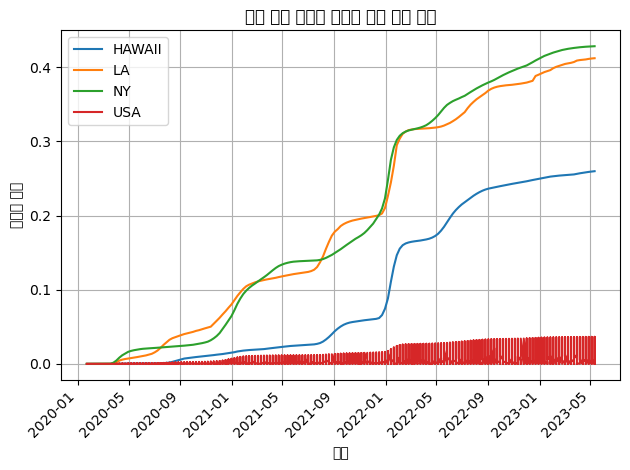

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# 인구 정보 (실제 값 기준)
population = {
    'HAWAII': 1_440_000,
    'LA': 3_882_000,
    'NY': 8_336_000,
    'USA': 336_269_656
}

# CSV 파일 선택 함수
def select_csv_file(title):
    print(f"{title} 파일을 선택하세요.")
    root = Tk()
    root.withdraw()  # Tkinter GUI 창 감춤
    file_path = filedialog.askopenfilename(title=title, filetypes=[("CSV files", "*.csv")])
    return file_path

# 데이터 처리 함수
def process_data(df, region_name):
    df = df[['date_updated', 'tot_cases']].copy()
    df['date_updated'] = pd.to_datetime(df['date_updated'])
    df = df.sort_values('date_updated')
    df.set_index('date_updated', inplace=True)
    df[region_name] = df['tot_cases'] / population[region_name]
    return df[[region_name]]

# 1. CSV 파일 경로 선택
hawaii_path = select_csv_file("하와이 covid 데이터 선택")
la_path = select_csv_file("LA covid 데이터 선택")
ny_path = select_csv_file("NY covid 데이터 선택")
usa_path = select_csv_file("USA covid 데이터 선택")

# 2. 데이터프레임 읽기
hawaii_df = pd.read_csv(hawaii_path)
la_df = pd.read_csv(la_path)
ny_df = pd.read_csv(ny_path)
usa_df = pd.read_csv(usa_path)

# 3. 각 지역별 비율 데이터 생성
hawaii_final = process_data(hawaii_df, 'HAWAII')
la_final = process_data(la_df, 'LA')
ny_final = process_data(ny_df, 'NY')
usa_final = process_data(usa_df, 'USA')

# 4. 모든 데이터 병합 (outer join으로 날짜 일치하지 않아도 합침)
final_df = pd.concat([hawaii_final, la_final, ny_final, usa_final], axis=1, join='outer')
final_df.fillna(0, inplace=True)  # 결측값 0으로 대체

# 5. 시각화
plt.figure(figsize=(12, 6))
final_df.plot.line(rot=45)
plt.title("인구 대비 코로나 확진자 비율 변화 추이")
plt.xlabel("날짜")
plt.ylabel("확진자 비율")
plt.grid(True)
plt.tight_layout()
plt.show()
